
Sentiment Distribution:
Sentiment
Positive    39
Negative    11
Name: count, dtype: int64

Emotion Distribution:
Emotion
None    50
Name: count, dtype: int64

Sentiment and emotion analysis saved to sentiment_results.csv


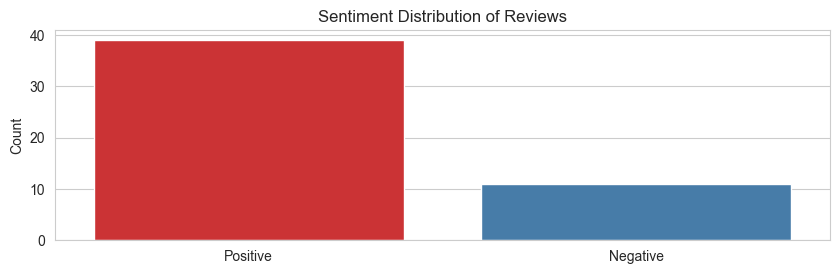

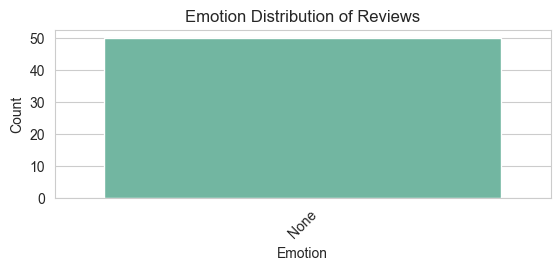


Key Insights:
- 78.0% positive reviews - shows customers are happy
- 22.0% negative reviews - points to needed improvements
- Most common emotion: None - use this in marketing
- Next Steps:
  - Use positive reviews in ads
  - Improve product based on negative feedback
  - Match marketing tone to the main emotion


In [1]:
############################################## TASK - 4 #######################################

import pandas as pd
from textblob import TextBlob
from nrclex import NRCLex
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download("movie_reviews", quiet=True)

########################### USING ONLY FIRST 50 RECORDS ###################
reviews = []
for fileid in nltk.corpus.movie_reviews.fileids()[:50]:  
    review_text = " ".join(nltk.corpus.movie_reviews.words(fileid))
    reviews.append({"Review": review_text})

df = pd.DataFrame(reviews)

def get_sentiment(text):
    try:
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            return "Positive"
        elif polarity < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"  


def get_emotions(text):
    try:
        nrc = NRCLex(text)
        emotions = nrc.top_emotions
        return emotions[0][0] if emotions and emotions[0][1] > 0 else "None"
    except:
        return "None"  

df["Sentiment"] = df["Review"].apply(get_sentiment)
df["Emotion"] = df["Review"].apply(get_emotions)

sentiment_counts = df["Sentiment"].value_counts()
emotion_counts = df["Emotion"].value_counts()

print("\nSentiment Distribution:")
print(sentiment_counts)
print("\nEmotion Distribution:")
print(emotion_counts)

df.to_csv("sentiment_results.csv", index=False)
print("\nSentiment and emotion analysis saved to sentiment_results.csv")

########################### BARPLOT ON SENTIMENT ANALYSIS ###################
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.subplot(2, 1, 1)
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette="Set1", legend=False)
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("")
plt.ylabel("Count")
plt.savefig("Sentiment_Distribution_of_Review.png")
plt.show()

########################### BAR PLOT ON EMOTIONS###################
plt.subplot(2, 1, 2)
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, hue=emotion_counts.index, palette="Set2", legend=False)
plt.title("Emotion Distribution of Reviews")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()
plt.savefig("sentiment_emotion_distribution.png")
plt.close()

positive_pct = (sentiment_counts.get("Positive", 0) / len(df)) * 100
negative_pct = (sentiment_counts.get("Negative", 0) / len(df)) * 100
dominant_emotion = emotion_counts.idxmax() if not emotion_counts.empty else "None"

print("\nKey Insights:")
print(f"- {positive_pct:.1f}% positive reviews - shows customers are happy")
print(f"- {negative_pct:.1f}% negative reviews - points to needed improvements") 
print(f"- Most common emotion: {dominant_emotion} - use this in marketing")
print("- Next Steps:")
print("  - Use positive reviews in ads")
print("  - Improve product based on negative feedback")
print("  - Match marketing tone to the main emotion")